# Fronteras de Decisión en Regresión Logística

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
names = "TEST_ojos TEST_oidos Choque".split()
df = pd.read_csv('./../datos/ClasificaConduccion.txt', names=names)
df.tail()

,TEST_ojos,TEST_oidos,Choque
93,89.845807,45.358284,1
94,83.489163,48.380286,1
95,42.261701,87.103851,1
96,99.315009,68.775409,1
97,55.340018,64.931938,1


## Calcular los parámetros del modelo de regresión logística

In [3]:
X = df.drop('Choque', axis=1)
X['Intercepto'] = 1
y = df.Choque
lm = sm.Logit(y, X)
lm_fit = lm.fit()

Optimization terminated successfully.
         Current function value: 0.207647
         Iterations 9


In [4]:
print(lm_fit.summary())

                           Logit Regression Results                           
Dep. Variable:                 Choque   No. Observations:                   98
Model:                          Logit   Df Residuals:                       95
Method:                           MLE   Df Model:                            2
Date:                Fri, 13 May 2022   Pseudo R-squ.:                  0.6911
Time:                        21:07:51   Log-Likelihood:                -20.349
converged:                       True   LL-Null:                       -65.873
Covariance Type:            nonrobust   LLR p-value:                 1.695e-20
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
TEST_ojos      0.2062      0.048      4.294      0.000       0.112       0.300
TEST_oidos     0.2014      0.049      4.141      0.000       0.106       0.297
Intercepto   -25.1574      5.801     -4.337      0.0

In [5]:
b1, b2, b0 = lm_fit.params

## Obtener la frontera de decisión

$$
\beta_0 + \beta_1X_1 + \beta_2X_2 = 0
$$
$$
X_2 =-\frac{\beta_0}{\beta_2} -\frac{\beta_1}{\beta_2}X_1
$$

In [6]:
X1 = np.linspace(X.TEST_ojos.min(), X.TEST_ojos.max())
X2 = -b0/b2 - b1/b2 * X1

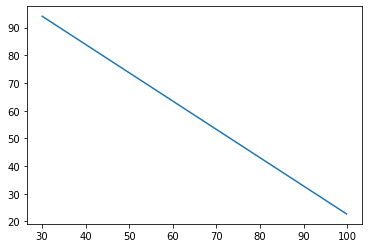

In [7]:
plt.plot(X1,X2)
plt.show()

In [8]:
Y0 = df[df.Choque == 0]
Y1 = df[df.Choque == 1]

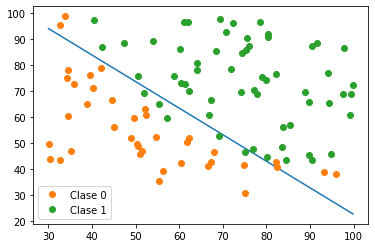

In [9]:
plt.plot(X1,X2)
plt.plot(
    df[df.Choque == 0].TEST_ojos,
    df[df.Choque == 0].TEST_oidos,
    'o',
    label="Clase 0",)
plt.plot(
    df[df.Choque == 1].TEST_ojos,
    df[df.Choque == 1].TEST_oidos,
    'o',
    label="Clase 1"
    )
plt.legend()
plt.show()

## Función de precisión

In [10]:
lm_fit.predict(X)

0     0.091059
1     0.000042
2     0.043927
3     0.990417
4     0.998197
        ...   
93    0.924545
94    0.858607
95    0.750838
96    0.999896
97    0.339293
Length: 98, dtype: float64

In [11]:
def predict(X, betas):
    return (X @ betas).map(lambda xb: 1 if xb > 0 else 0)

df['Predicciones'] = predict(X, lm_fit.params)
df.head()

,TEST_ojos,TEST_oidos,Choque,Predicciones
0,34.623660,78.024693,0,0
1,30.286711,43.894998,0,0
2,35.847409,72.902198,0,0
3,60.182599,86.308552,1,1
4,79.032736,75.344376,1,1


$$
Precision = 1 -\frac{\sum_i^m \left| Y^{(i)} - \hat{Y}^{(i)} \right|}{m}
$$

In [13]:
precision = 1 - (np.abs(df.Choque - df.Predicciones)).sum() / len(y)
print(f'Precision: {precision}')

Precision: 0.8877551020408163
